In [1]:
from pathlib import Path
import torch
path_model_and_dependencies = "../../models/sequence_translator_transformer.pth"

if load_from_backup and Path(path_model_and_dependencies).exists():
    back_up = torch.load(path_model_and_dependencies)
    for el1,el2 in zip([model,scheduler,optimizer,scheduler,losses,metrics],
                      ["model_params","scheduler","optimizer","losses","metrics"]):
        if el2 in restore_from_backup:
            if el2 == "losses":
                losses = back_up[el2]
            elif el2 == "metrics":
                metrics = back_up[el2]
            else:
                el1.load_state_dict(back_up[el2])
                
    print("model loaded")

NameError: name 'load_from_backup' is not defined

  0%|                                                                                     | 0/300 [00:00<?, ?it/s]

optimizing for epoch 0
training_step
0 6.772348453861256
100 5.860094901842949
200 5.394500353791874
validation_step
0 5.199662324979708
saving for epoch 0


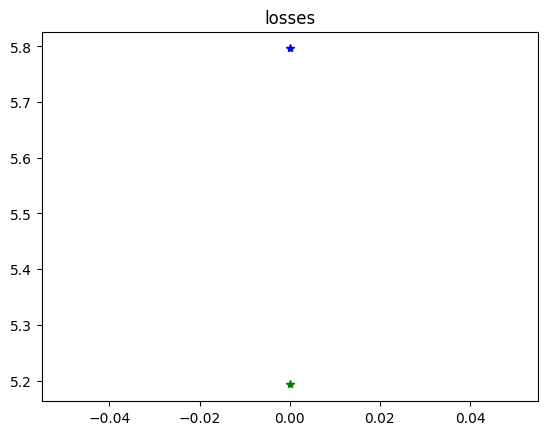

  0%|▎                                                                          | 1/300 [00:35<2:58:36, 35.84s/it]

optimizing for epoch 1
training_step
0 5.303297687647754
100 3.131652987336991
200 2.579823786095728
validation_step
0 2.4936193941797877
saving for epoch 1


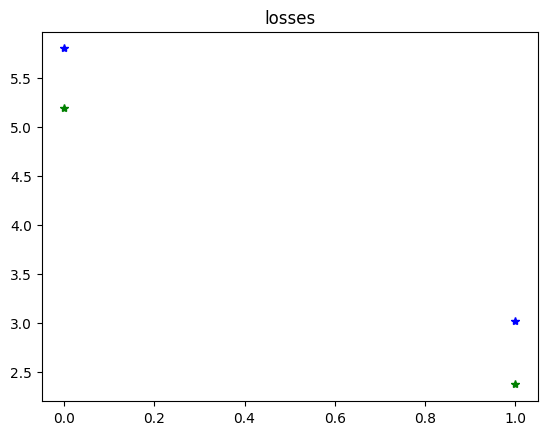

  1%|▌                                                                          | 2/300 [01:11<2:56:38, 35.56s/it]

optimizing for epoch 2
training_step
0 2.5783624435006236
100 2.0147387186686196
200 1.9396944022472993
validation_step
0 1.9445963026602058
saving for epoch 2


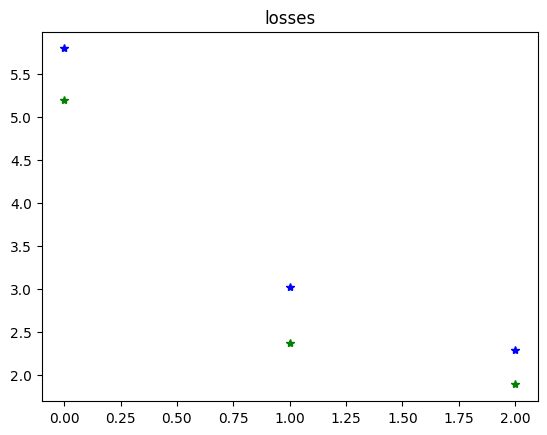

  1%|▊                                                                          | 3/300 [01:47<2:58:42, 36.10s/it]

optimizing for epoch 3
training_step
0 1.9025882135623347
100 1.7178308378082352
200 1.475392790257471
validation_step
0 1.4128320126133112
saving for epoch 3


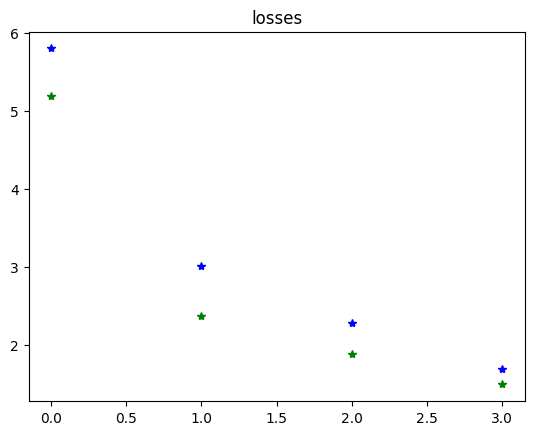

  1%|█                                                                          | 4/300 [02:23<2:56:44, 35.83s/it]

optimizing for epoch 4
training_step
0 1.3813838017451299
100 1.4582956869771162
200 1.3151404404058689
validation_step
0 1.3372665014022436
saving for epoch 4


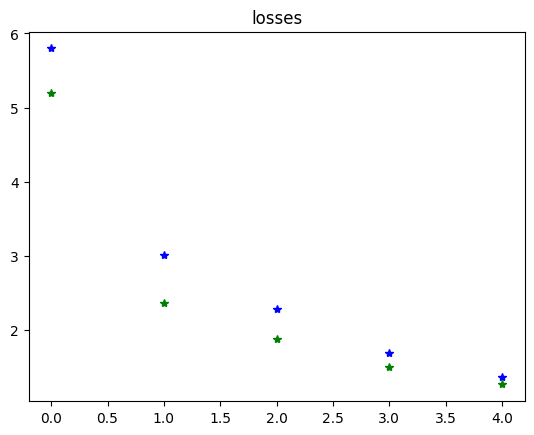

  2%|█▎                                                                         | 5/300 [02:58<2:55:41, 35.73s/it]

optimizing for epoch 5
training_step
0 1.15588907676168
100 1.2976514851144338


  2%|█▎                                                                         | 5/300 [03:12<3:09:39, 38.58s/it]


KeyboardInterrupt: 

In [17]:
import matplotlib.pyplot as plt

best_loss_val_mean = np.inf
best_epoch = scheduler.last_epoch

for epoch in tqdm(range(nb_epochs)):
    #import time
    #start = time.time()
    print(f"optimizing for epoch {epoch}")
    print("training_step")
    loss_train,nb_words_per_batch_train,metric_train = model_trainer.train_on_epoch()
    
    print("validation_step")
    loss_val,nb_words_per_batch_val,metric_val = model_trainer.validate_on_epoch()

    loss_train = np.array([float(el) for el in loss_train])
    loss_val = np.array([float(el) for el in loss_val])
    train_weights = 1/sum(nb_words_per_batch_train)
    val_weights = 1/sum(nb_words_per_batch_val)
    
    
        
    losses["train"].append(np.sum(loss_train)/sum(nb_words_per_batch_train))
    losses["val"].append(np.sum(loss_val)/sum(nb_words_per_batch_val))
    metrics["train"].append(metric_train)
    metrics["val"].append(metric_val)
    
    current_loss_val_mean = np.mean(loss_val)
    
    if (current_loss_val_mean < best_loss_val_mean):
        best_epoch = scheduler.last_epoch
        best_loss_val_mean = current_loss_val_mean

        model_training_state = {"model_params":model_trainer.model.state_dict(),
                               "model_inputs":model_inputs,
                              "optimizer":optimizer.state_dict(),
                              "scheduler":scheduler.state_dict(),
                              "losses":losses,
                              "metrics":metrics
                              }
        
        torch.save(model_training_state,path_model_and_dependencies)
        print(f"saving for epoch {epoch}")

        plt.plot(losses["train"],"b*")
        plt.plot(losses["val"],"g*")
        plt.title("losses")
        plt.show()        
        #plt.figure()
        #plt.plot(metrics["train"],"b*")
        #plt.plot(metrics["val"],"g*")
        #plt.title("bleu score")
        #plt.show()
    elif epoch - best_epoch > early_stop_thresh  and early_stopping_activated:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop
    #stop = time.time()
    #print(stop-start)

    del loss_train,nb_words_per_batch_train,metric_train

    del loss_val,nb_words_per_batch_val,metric_val


In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses["train"],"b*")
plt.plot(losses["val"],"g*")
plt.title("losses")
plt.show()        